# Big Basket Data Analaysis
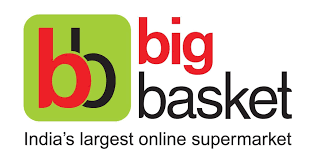

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\gokul\\Downloads\\BigBasket Products.csv")

In [3]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [5]:
df.count()

index           27555
product         27554
category        27555
sub_category    27555
brand           27554
sale_price      27555
market_price    27555
type            27555
rating          18929
description     27440
dtype: int64

In [6]:
df.isnull().count()

index           27555
product         27555
category        27555
sub_category    27555
brand           27555
sale_price      27555
market_price    27555
type            27555
rating          27555
description     27555
dtype: int64

In [7]:
df = df.set_index("index")

In [8]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


### Geeting Idea of Nulls

<AxesSubplot:ylabel='index'>

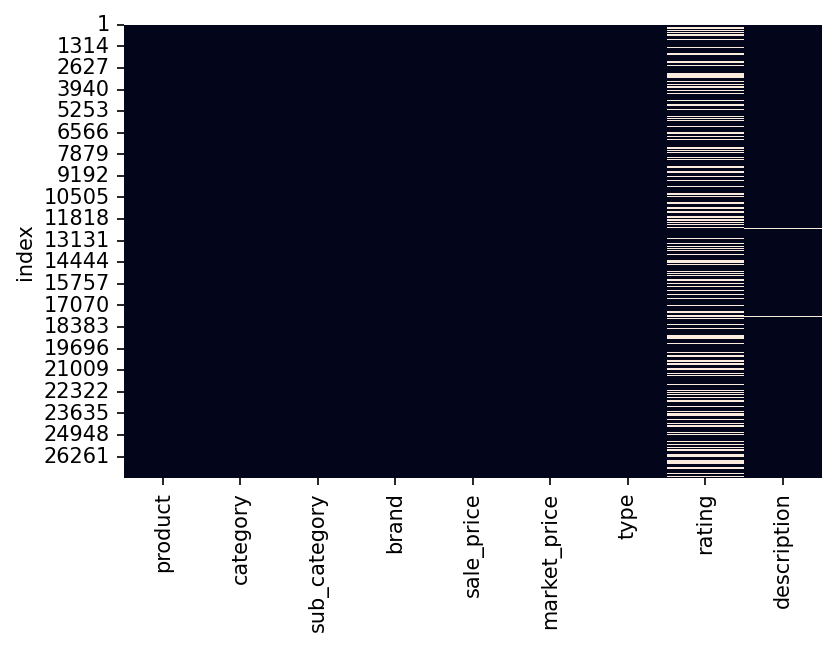

In [9]:
#plotting on a heat map to get an idea about the null data's which are present
plt.figure(figsize=(6,4), dpi=150)
sns.heatmap(df.isnull(), cbar=False)

In [10]:
#calculating the percentage of missing values and visualizing the data
percentage_missing = df.isnull().sum() * 100 / len(df)
missing_values_df = pd.DataFrame({'columns_name': df.columns,
                                   'percentage_missing': percentage_missing})

In [11]:
missing_values_df

,columns_name,percentage_missing
product,product,0.003629
category,category,0.000000
sub_category,sub_category,0.000000
brand,brand,0.003629
sale_price,sale_price,0.000000
market_price,market_price,0.000000
type,type,0.000000
rating,rating,31.304663
description,description,0.417347


#### Okay, there seems to be a lot of null values in the ratings section, as it is quite obvious that not all people who purchase will leave a rating of that product.

In [12]:
#Having a look at the unique product category in category column
for elem in df['category'].unique():
    print(elem)

Beauty & Hygiene
Kitchen, Garden & Pets
Cleaning & Household
Gourmet & World Food
Foodgrains, Oil & Masala
Snacks & Branded Foods
Beverages
Bakery, Cakes & Dairy
Baby Care
Fruits & Vegetables
Eggs, Meat & Fish


In [13]:
#Having a look at the unique sub_category category in sub_category column
for elem in df['sub_category'].unique():
    print(elem)

Hair Care
Storage & Accessories
Pooja Needs
Bins & Bathroom Ware
Bath & Hand Wash
All Purpose Cleaners
Skin Care
Mops, Brushes & Scrubs
Cooking & Baking Needs
Chocolates & Biscuits
Fresheners & Repellents
Snacks, Dry Fruits, Nuts
Dairy & Cheese
Pasta, Soup & Noodles
Dry Fruits
Drinks & Beverages
Kitchen Accessories
Flask & Casserole
Breakfast Cereals
Frozen Veggies & Snacks
Fruit Juices & Drinks
Cookies, Rusk & Khari
Fragrances & Deos
Tea
Masalas & Spices
Men's Grooming
Chocolates & Candies
Steel Utensils
Tinned & Processed Food
Organic Staples
Sauces, Spreads & Dips
Pickles & Chutney
Ready To Cook & Eat
Baby Bath & Hygiene
Stationery
Pet Food & Accessories
Biscuits & Cookies
Oral Care
Snacks & Namkeen
Detergents & Dishwash
Crockery & Cutlery
Cuts & Sprouts
Health & Medicine
Cookware & Non Stick
Dairy
Feminine Hygiene
Diapers & Wipes
Edible Oils & Ghee
Baby Food & Formula
Fresh Fruits
Fresh Vegetables
Herbs & Seasonings
Breads & Buns
Oils & Vinegar
Feeding & Nursing
Energy & Soft Drink

In [14]:
#fetching the data of how many unique sub_category items are there in the df
unique, sub_cat_count = np.unique(df['sub_category'], return_counts=True)
dict(zip(unique, sub_cat_count))

{'All Purpose Cleaners': 475,
 'Appliances & Electricals': 138,
 'Atta, Flours & Sooji': 152,
 'Baby Accessories': 37,
 'Baby Bath & Hygiene': 206,
 'Baby Food & Formula': 48,
 'Bakery Snacks': 39,
 'Bakeware': 48,
 'Bath & Hand Wash': 996,
 'Bins & Bathroom Ware': 392,
 'Biscuits & Cookies': 305,
 'Breads & Buns': 48,
 'Breakfast Cereals': 254,
 'Cakes & Pastries': 125,
 'Car & Shoe Care': 48,
 'Cereals & Breakfast': 204,
 'Chocolates & Biscuits': 609,
 'Chocolates & Candies': 274,
 'Coffee': 90,
 'Cookies, Rusk & Khari': 153,
 'Cooking & Baking Needs': 693,
 'Cookware & Non Stick': 354,
 'Crockery & Cutlery': 890,
 'Cuts & Sprouts': 96,
 'Dairy': 385,
 'Dairy & Cheese': 253,
 'Dals & Pulses': 192,
 'Detergents & Dishwash': 261,
 'Diapers & Wipes': 247,
 'Disposables, Garbage Bag': 165,
 'Drinks & Beverages': 736,
 'Dry Fruits': 203,
 'Edible Oils & Ghee': 248,
 'Eggs': 34,
 'Energy & Soft Drinks': 111,
 'Exotic Fruits & Veggies': 70,
 'Feeding & Nursing': 48,
 'Feminine Hygiene': 285

In [15]:
#having a look at how elements are percent at type column in the data set
for elem in df['type'].unique():
    print(elem)

Hair Oil & Serum
Water & Fridge Bottles
Lamp & Lamp Oil
Laundry, Storage Baskets
Bathing Bars & Soaps
Disinfectant Spray & Cleaners
Face Care
Hand Wash & Sanitizers
Shampoo & Conditioner
Utensil Scrub-Pad, Glove
Flours & Pre-Mixes
Luxury Chocolates, Gifts
Floor & Other Cleaners
Mosquito Repellent
Soap Cases & Dispensers
Aromatherapy
Roasted Seeds & Nuts
Tofu
Tools & Accessories
Imported Noodles
Other Dry Fruits
Gourmet Tea & Tea Bags
Choppers & Graters
Casserole
Granola & Cereal Bars
Frozen Veg Snacks
Lip Care
Juices
Bakery Biscuits, Cookies
Men's Deodorants
Green Tea
Containers Sets
Whole Spices
Blended Masalas
Chocolates
Eau De Toilette
Cookies, Biscotti, Wafer
Steel Lunch Boxes
Olive, Jalapeno, Gherkin
Organic Rice, Other Rice
Shaving Care
Imported Cleaners
Thai & Asian Sauces
Chutney Powder
Cooking Pastes
Gourmet Juices & Drinks
Face & Body
Beans & Pulses
Papads, Ready To Fry
Hair & Scalp Treatment
Baby Health
Notebooks, Files, Folders
Kitchen Tools & Other Accessories
Pet Meals & 

## Data processing
So, to solve the problem with null values, we can take the mean of each category and assign it to the null values in the data frame. For example, if there are any null values in the snakes category, we will fill them with the snakes mean value.

This is quite tricky with these types of data sets, as we are attempting to normalize the data for the missing values in the rating column.

In [16]:
#taking care of the null values
#we are trying to fill the null value column by grouping the df by category and fetching the rating to
#transform the existing column with the mean rating for each category
df['rating'].fillna(df.groupby('category')['rating'].transform('mean'), inplace=True)

<AxesSubplot:ylabel='index'>

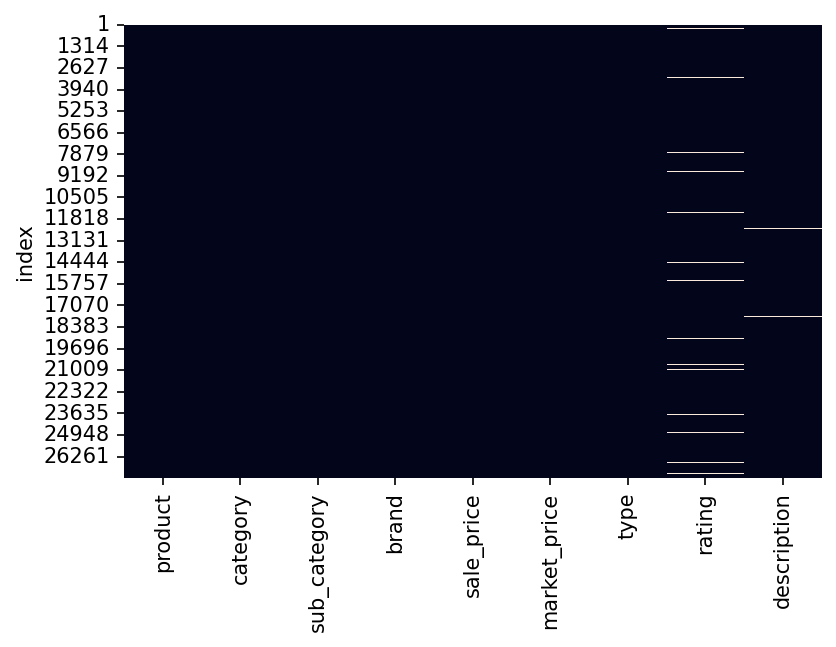

In [17]:
#checking the heat map to see if the above normalization works
plt.figure(figsize=(6,4), dpi=150)
sns.heatmap(df.isnull(), cbar=False)

Okay, it seems like we have normalized the data to a larger extent, let's quickly have a look at the numbers

In [18]:
#calculating the percentage of missing values after normalization
percentage_missing = df.isnull().sum() / len(df) * 100
missing_values_df = pd.DataFrame({'columns': df.columns, 'null_percentage': percentage_missing})

In [19]:
missing_values_df

,columns,null_percentage
product,product,0.003629
category,category,0.000000
sub_category,sub_category,0.000000
brand,brand,0.003629
sale_price,sale_price,0.000000
market_price,market_price,0.000000
type,type,0.000000
rating,rating,3.291599
description,description,0.417347


##### We have brought down the null values from 31.30% to 3.29% with normalization!

In [20]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [21]:
df = df.reset_index()

In [22]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [23]:
# AVG Rating, Sale Price & market_price Per catagory
#And sorting based on ratings
AVG_DF = df[['category','rating','sale_price','market_price']].groupby('category').mean()
AVG_DF = np.round(AVG_DF, 2)
AVG_DF.reset_index()

,category,rating,sale_price,market_price
0,Baby Care,4.02,534.95,596.75
1,"Bakery, Cakes & Dairy",3.91,142.80,157.88
2,Beauty & Hygiene,3.93,418.68,493.54
3,Beverages,4.08,239.76,272.23
4,Cleaning & Household,3.96,226.17,262.11
5,"Eggs, Meat & Fish",NaN,288.90,325.84
6,"Foodgrains, Oil & Masala",4.06,193.17,230.13
7,Fruits & Vegetables,NaN,50.89,64.43
8,Gourmet & World Food,3.98,319.85,358.42
9,"Kitchen, Garden & Pets",3.73,507.52,659.66


In [24]:
#have noticed a 2 Nan values in the rating column of Eggs, Meat & Fish & Fruits & Vegetables
#so we will ignore that for viz
AVG_DF = AVG_DF.sort_values('rating', ascending=False)
AVG_DF = AVG_DF.reset_index()
AVG_DF

,category,rating,sale_price,market_price
0,Beverages,4.08,239.76,272.23
1,"Foodgrains, Oil & Masala",4.06,193.17,230.13
2,Baby Care,4.02,534.95,596.75
3,Gourmet & World Food,3.98,319.85,358.42
4,Snacks & Branded Foods,3.98,129.59,140.78
5,Cleaning & Household,3.96,226.17,262.11
6,Beauty & Hygiene,3.93,418.68,493.54
7,"Bakery, Cakes & Dairy",3.91,142.80,157.88
8,"Kitchen, Garden & Pets",3.73,507.52,659.66
9,"Eggs, Meat & Fish",NaN,288.90,325.84


In [25]:
AVG_DF = AVG_DF.head(9)
AVG_DF

,category,rating,sale_price,market_price
0,Beverages,4.08,239.76,272.23
1,"Foodgrains, Oil & Masala",4.06,193.17,230.13
2,Baby Care,4.02,534.95,596.75
3,Gourmet & World Food,3.98,319.85,358.42
4,Snacks & Branded Foods,3.98,129.59,140.78
5,Cleaning & Household,3.96,226.17,262.11
6,Beauty & Hygiene,3.93,418.68,493.54
7,"Bakery, Cakes & Dairy",3.91,142.80,157.88
8,"Kitchen, Garden & Pets",3.73,507.52,659.66


# Few EDA's

In [26]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


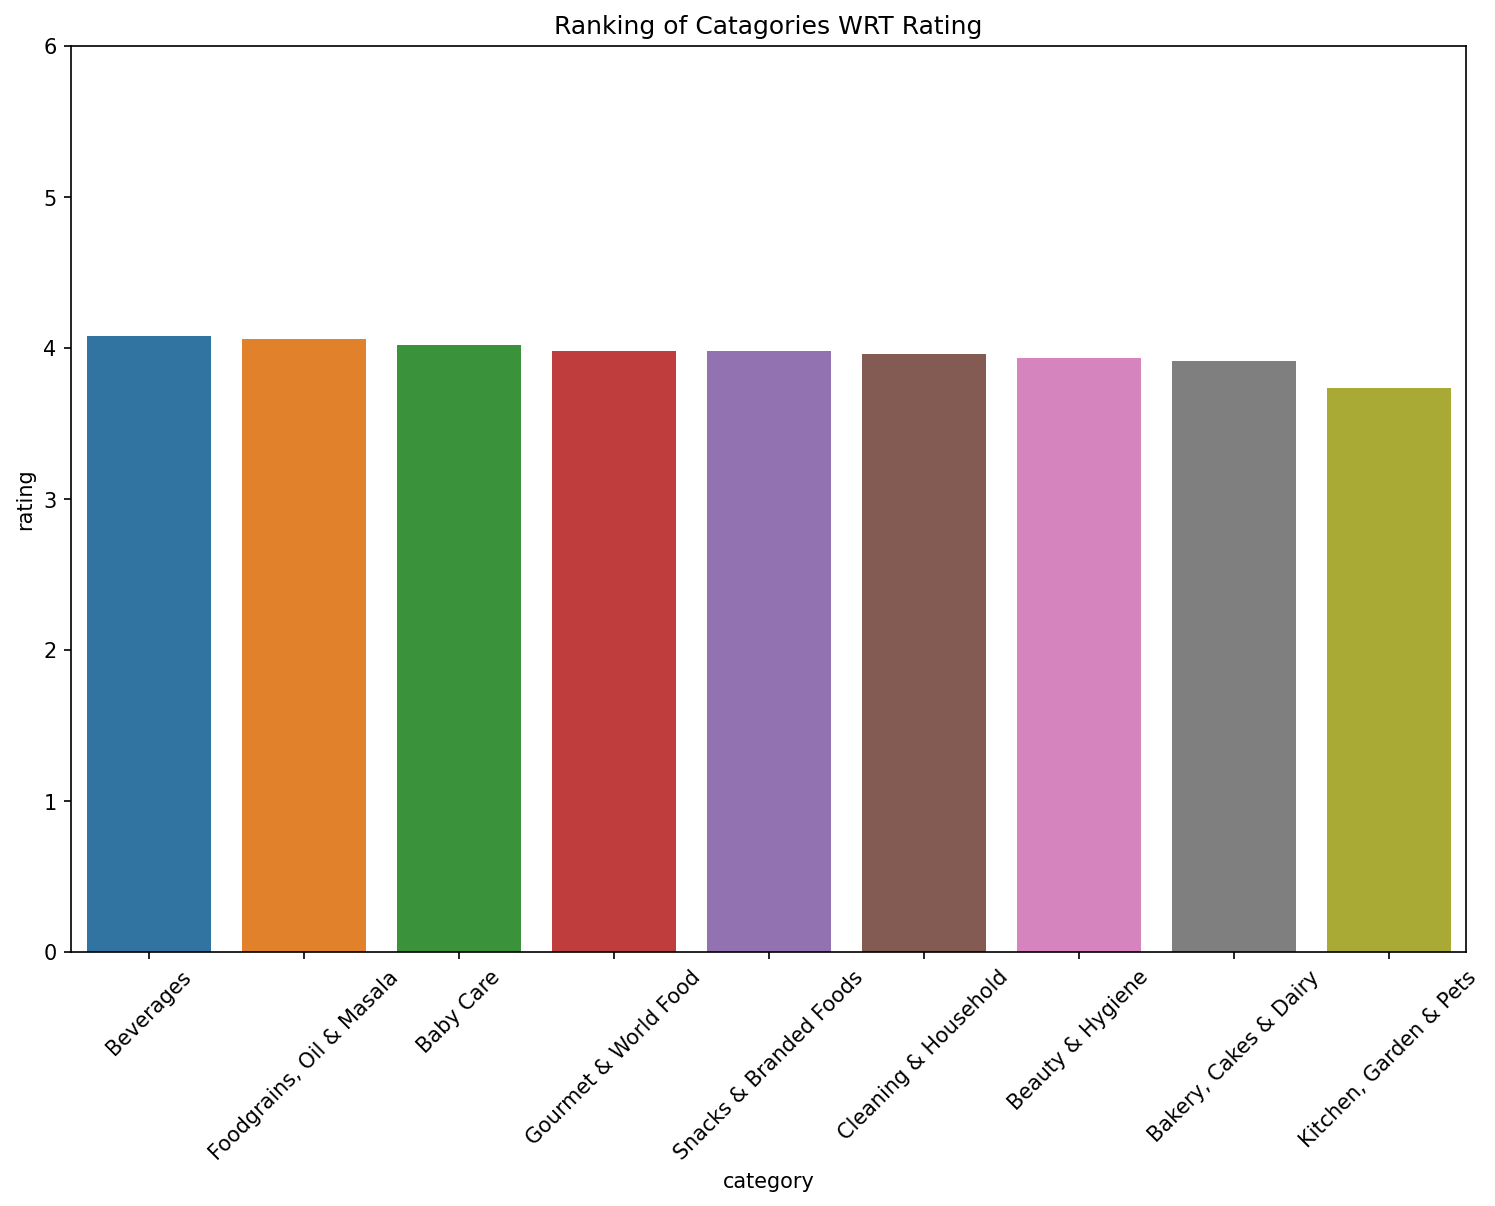

In [27]:
plt.figure(figsize=(12,8), dpi=150)
plt.ylim(0,6)
sns.barplot(data=AVG_DF, x='category', y='rating')
plt.xticks(rotation=45)
plt.title("Ranking of Catagories WRT Rating");

### Ranking of Catagories WRT AVG Market Price

Text(0.5, 1.0, 'Ranking of Catagories WRT AVG Market Price')

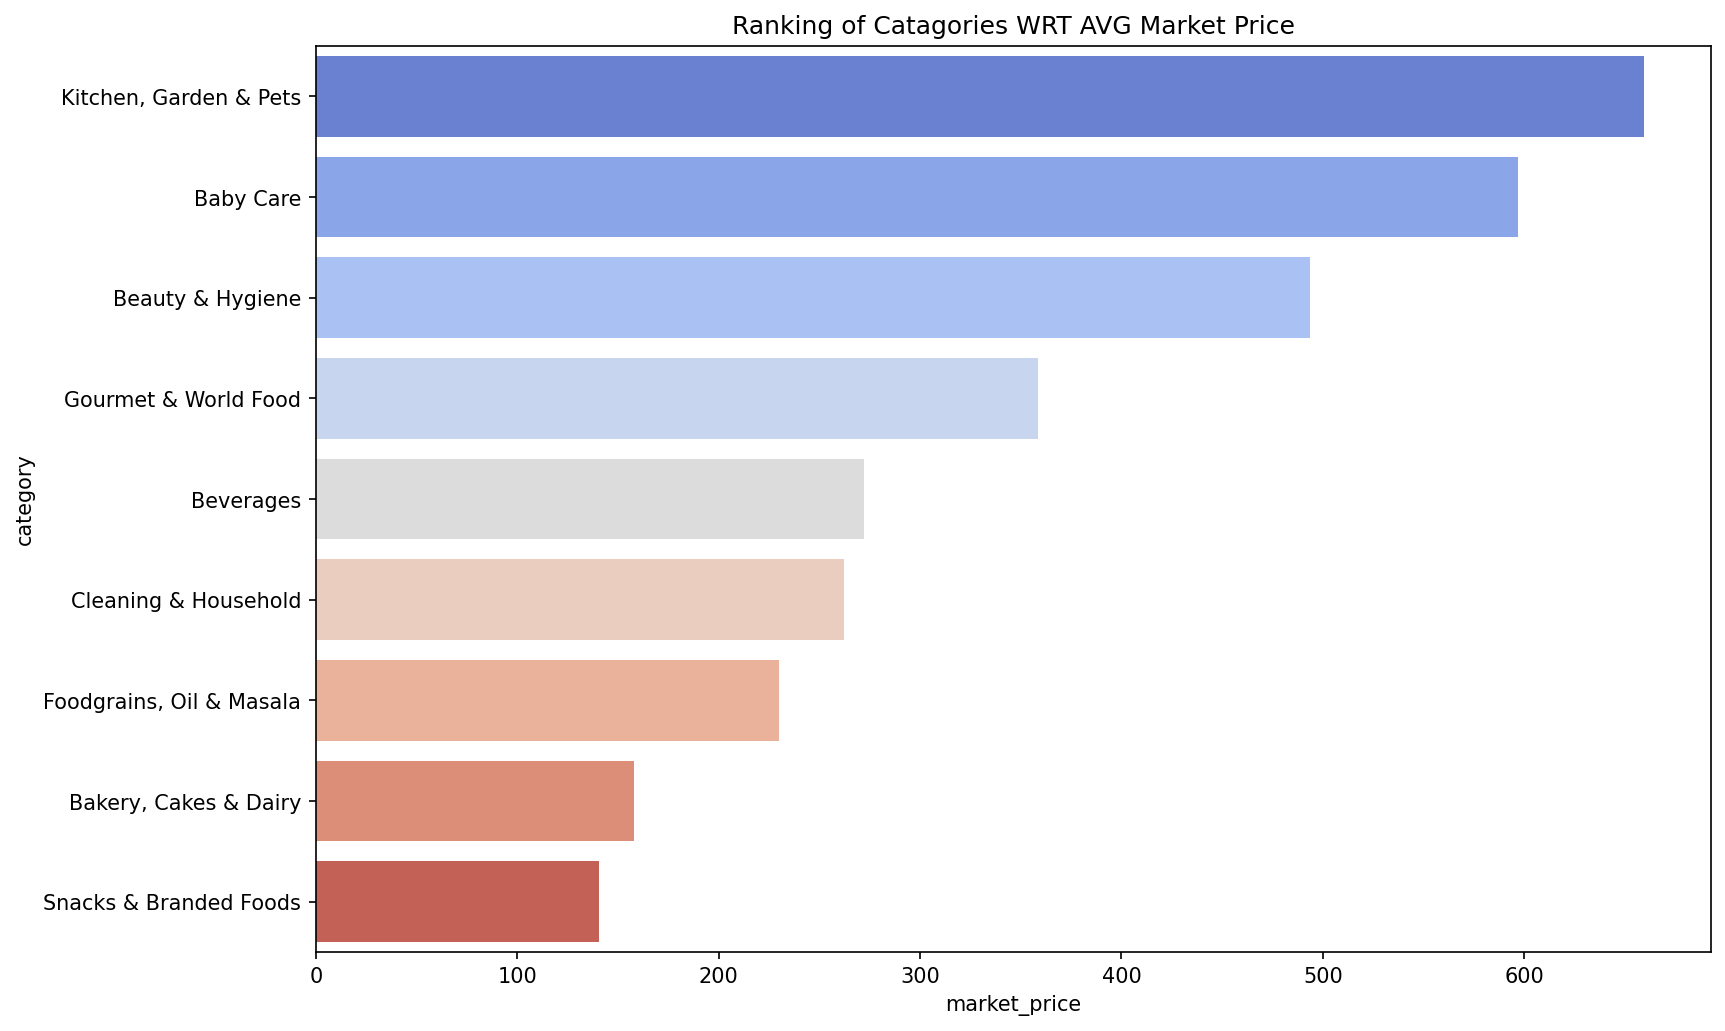

In [28]:
avg_market_price_df = AVG_DF.sort_values('market_price', ascending=False)

plt.figure(figsize=(12,8), dpi=150)
sns.barplot(data=avg_market_price_df, x='market_price', y='category', palette='coolwarm', )
plt.title("Ranking of Catagories WRT AVG Market Price")

### Ranking of Catagories WRT AVG Sale Price

Text(0.5, 1.0, 'Ranking of Catagories WRT AVG Sale Price')

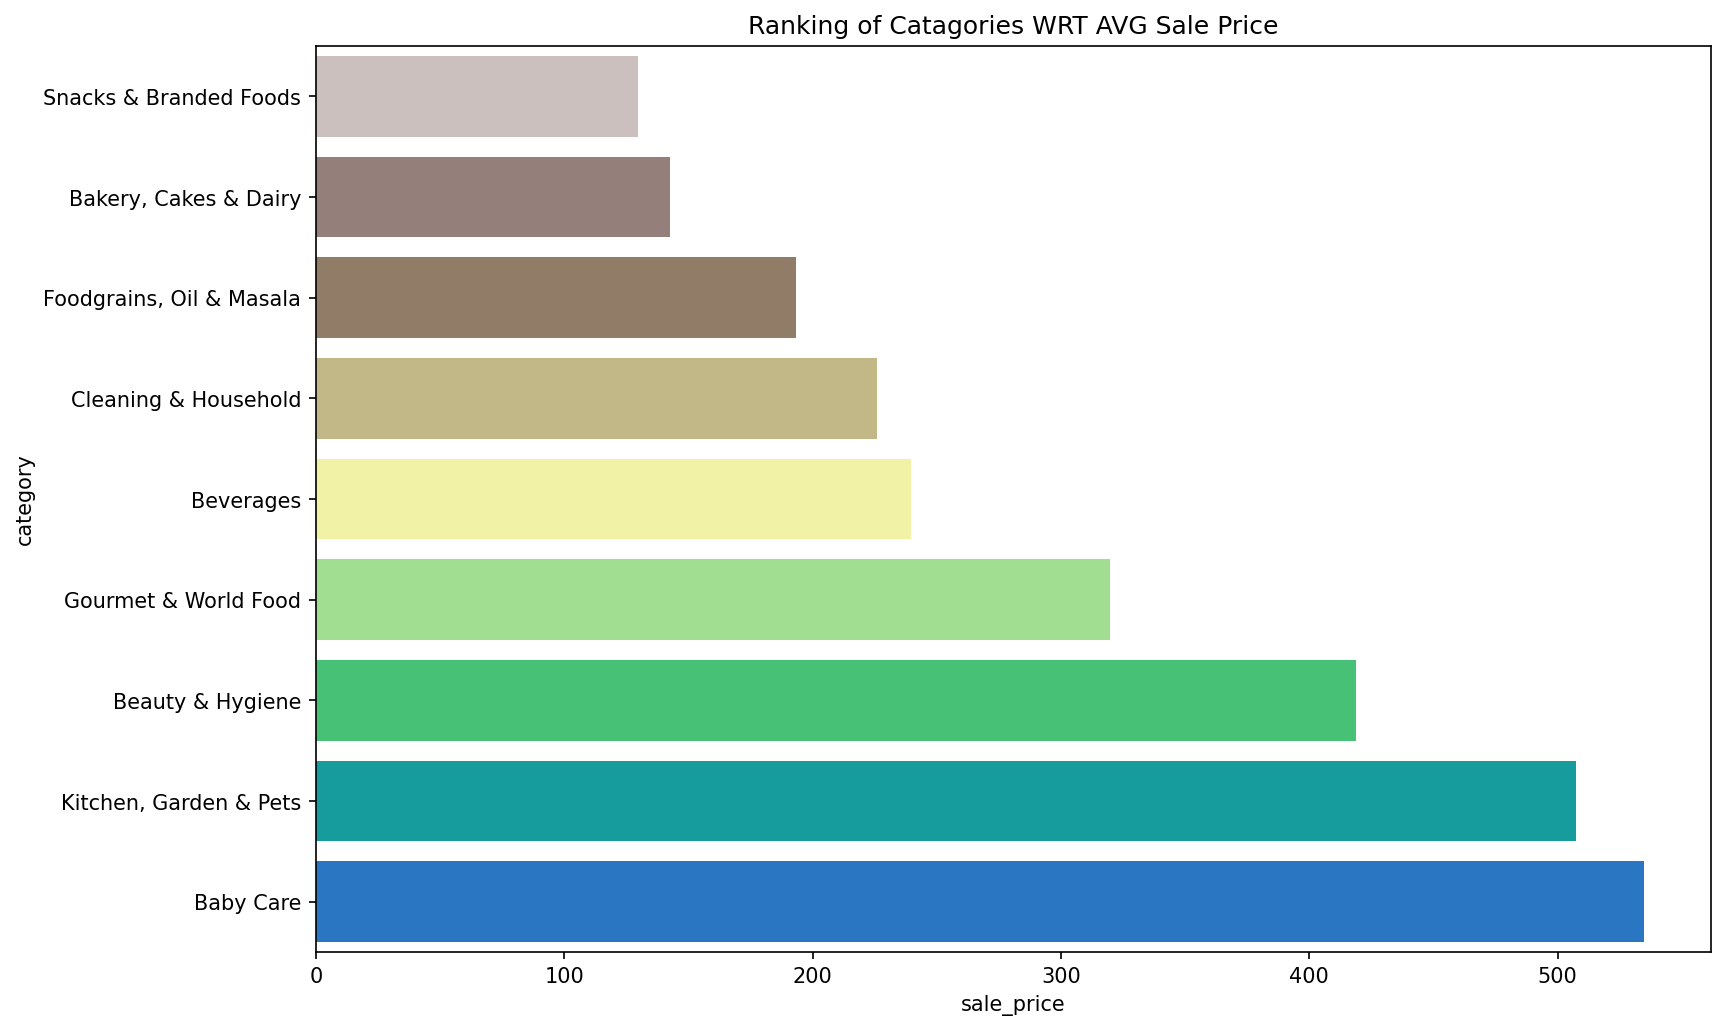

In [29]:
#same as the above but this time we are calculating it for sale price
avg_sale_price_df = AVG_DF.sort_values('sale_price', ascending=True)

plt.figure(figsize=(12,8), dpi=150)
sns.barplot(data=avg_sale_price_df, x='sale_price', y='category', palette='terrain_r', )
plt.title("Ranking of Catagories WRT AVG Sale Price")

##### So, now that we have visualized the ranking of avg market price and the avg sale price, we will compare these on a scatter plot to see if there is any actual diff or correlation

##### Comparision of cross Market Price and Sale Price

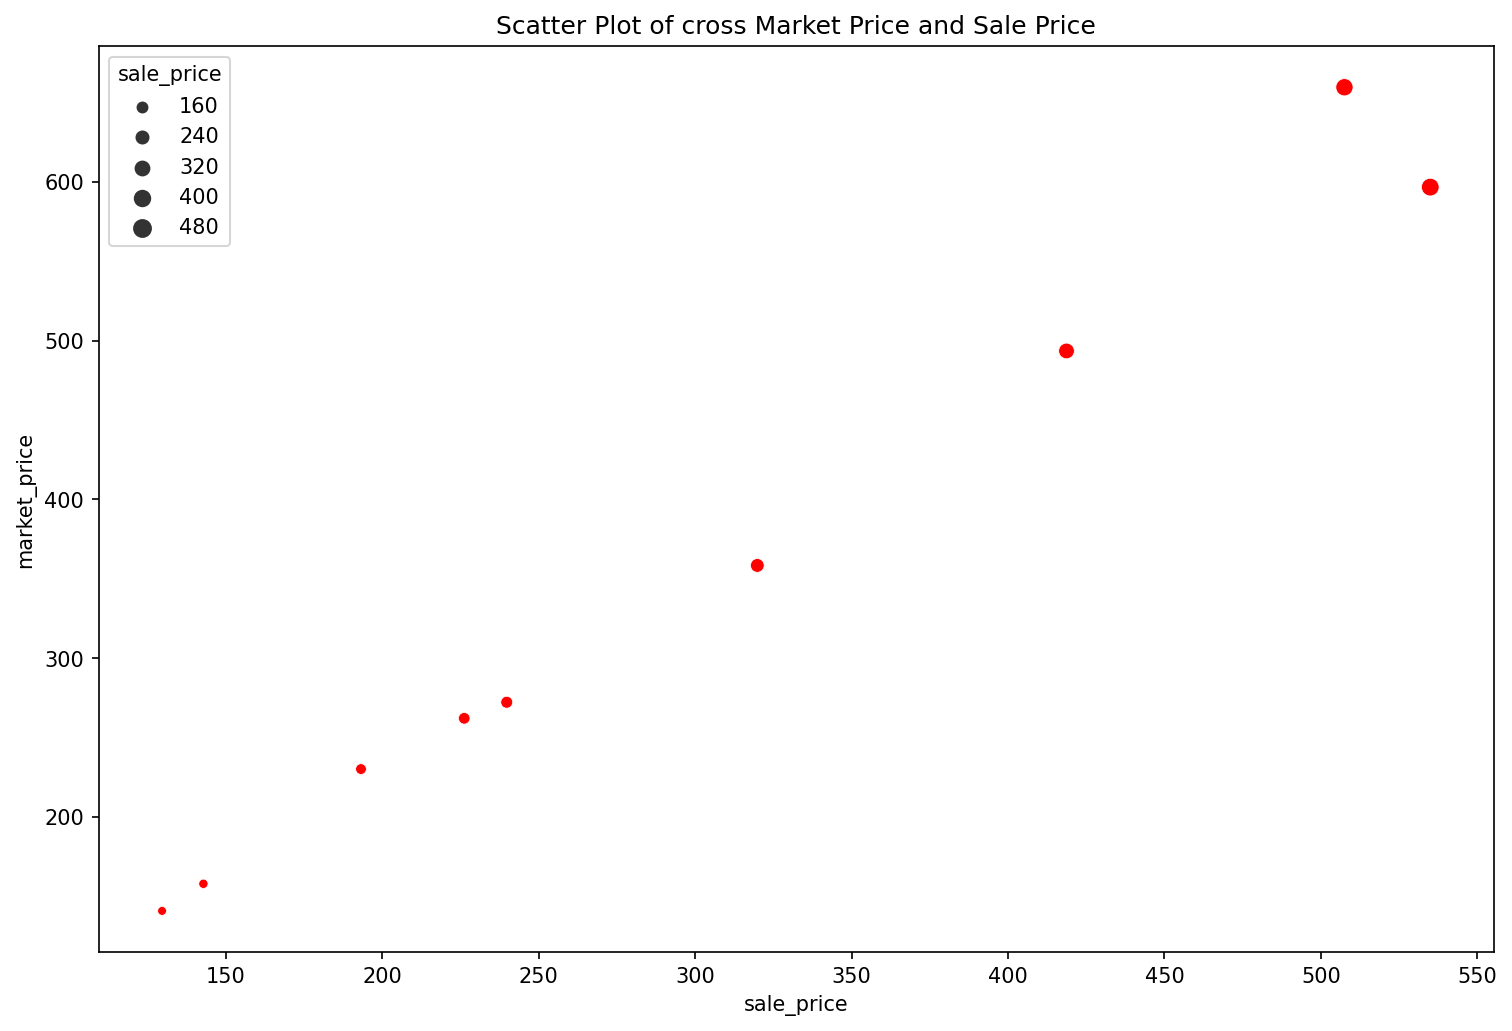

In [30]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(data=avg_sale_price_df,x="sale_price", y="market_price", color="red",
                 size='sale_price')
plt.title('Scatter Plot of cross Market Price and Sale Price');

#### Moving towards Sub Category

In [31]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [32]:
# AVG Rating, Sale Price & market_price Per Sub-catagory
AVG_SUB_DF = df[['sub_category', 'rating', 'market_price', 'sale_price']].groupby(['sub_category']).mean()
AVG_SUB_DF

,rating,market_price,sale_price
sub_category,,,
All Purpose Cleaners,4.056344,293.566316,271.590611
Appliances & Electricals,3.750623,418.391304,256.474275
"Atta, Flours & Sooji",4.035397,182.467105,149.826579
Baby Accessories,3.333457,409.648649,409.648649
Baby Bath & Hygiene,4.093454,433.451456,419.088689
...,...,...,...
Steel Utensils,3.590807,689.781870,416.385269
Storage & Accessories,3.721733,431.735961,303.489655
Tea,4.104538,327.829341,269.842874


In [33]:
AVG_SUB_DF = AVG_SUB_DF.reset_index().sort_values('rating', ascending=False)

In [34]:
AVG_SUB_DF = np.round(AVG_SUB_DF, 2)

In [35]:
AVG_SUB_DF.head()

,sub_category,rating,market_price,sale_price
27,Detergents & Dishwash,4.20,312.69,269.75
89,Water,4.17,155.88,153.19
5,Baby Food & Formula,4.17,361.44,358.32
34,Energy & Soft Drinks,4.16,160.73,150.44
10,Biscuits & Cookies,4.15,76.68,65.29


#### Scatter Plot of cross Market Price and Sale Price Per Sub Category

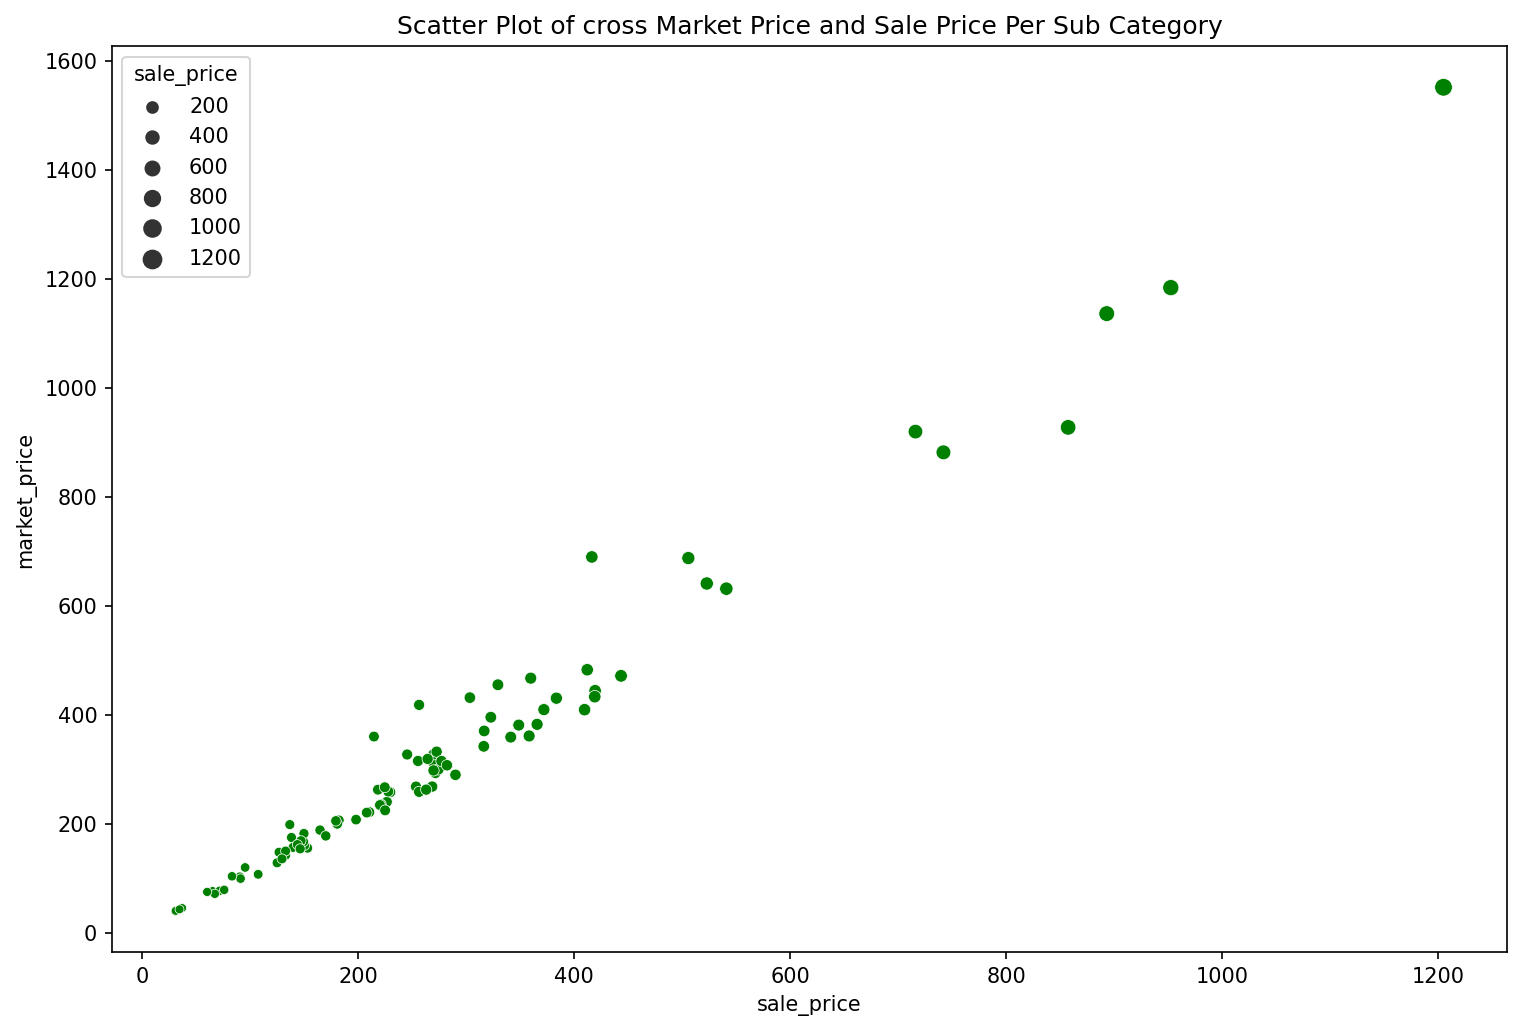

In [36]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(data=AVG_SUB_DF,x="sale_price", y="market_price", color="green",
                 size='sale_price')
plt.title('Scatter Plot of cross Market Price and Sale Price Per Sub Category');